In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [12]:
%load_ext autoreload
%autoreload 2
from flamingchoripan.files import get_roodirs

rootdir = '../save'
kf = '0'
mode = 'fine-tuning'
method = 'spm-mcmc-estw'

cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
roodirs = get_roodirs(rootdir)
model_names = [r.split('/')[-1] for r in roodirs if '~' in r]# patch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
baselines_dict = {
    '0@val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    '0@test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['0'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~rsc=0
ids=['0'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=16~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~rsc=0


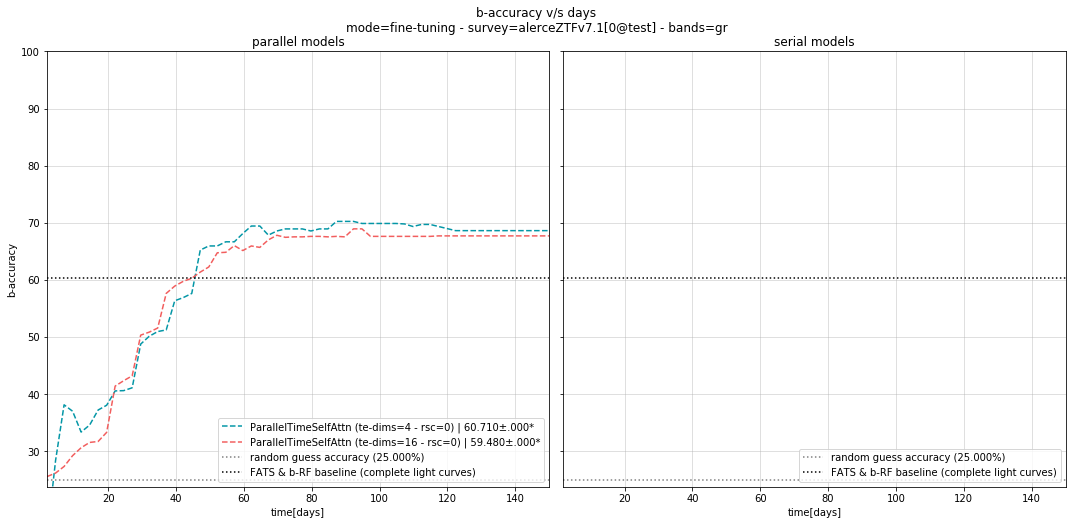

In [29]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
]
lcset_name = 'test'
metric_name = 'b-accuracy' # accuracy f1score
kwargs = {
    'label_keys':label_keys,
    'baselines_dict':baselines_dict,
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, metric_name, **kwargs)

In [10]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import filter_models

condition_dict = {
    #'cell':['GRU', 'LSTM'],
    'aggr':['max', 'avg'],
    #'mdl':['ParallelTimeSelfAttn', 'SerialTimeSelfAttn'],
    #'mdl':['ParallelTimeSelfAttn', 'SerialTimeSelfAttn'],
    #'mdl':['ParallelTimeSelfAttn', 'SerialTimeSelfAttn', 'ParallelTimeErrorSelfAttn', 'SerialTimeErrorSelfAttn'],
    'rsc':['0'],
}
new_model_names = [
    'mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~cell=GRU~rsc=0',
    'mdl=SerialRNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~cell=GRU~rsc=0',
   
    'mdl=ParallelTCNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~aggr=avg~rsc=0',
    'mdl=SerialTCNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~aggr=avg~rsc=0',

    'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~rsc=0',
    'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~rsc=0',
    
    'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~rsc=1',
    'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~rsc=1',
]
new_model_names = model_names
#new_model_names = filter_models(model_names, condition_dict)
for kmn,model_name in enumerate(new_model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_models_from_rootdir

method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
rootdir = f''
    


survey_name = 'alerceZTFv7.1'


set_name = f'{kf}@r_test' # s_train r_train s_val r_val r_test
rootdir = f'../save/experiments/{set_name}'
cset_name = set_name.split('@')[-1]
model_names = get_models_from_rootdir(f'{rootdir}/{mode}')
for kmn,model_name in enumerate(model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# metrics v/s days

In [8]:
baselines_dict = {
    'r_val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    'r_test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

In [9]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric


kwargs = {
    'label_keys':label_keys,
    'set_name':set_name,
}
metric_name = 'b-accuracy' # b-accuracy b-f1score
plot_metric(rootdir, metric_name, new_model_names, baselines_dict.get(cset_name, None), **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: plot_metric() got an unexpected keyword argument 'set_name'

In [ ]:
a%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_query_df_table
from flamingchoripan.latex.latex_tables import LatexTable

kwargs = {
    'arch_modes':['Parallel', 'Serial'],
    #'arch_modes':['Serial'],
}
metric_names = ['b-accuracy', 'b-f1score', 'b-gmean', 'b-xentropy']
day_to_metric = 150
#query_key = 'cell'; query_values = ['GRU', 'LSTM']
query_key = 'aggr'; query_values = ['avg', 'max']
#query_key = 'te-dims'; query_values = [str(i) for i in [4, 8, 16]]

info_df = get_query_df_table(rootdir, metric_names, new_model_names, day_to_metric, query_key, query_values, **kwargs)

latex_kwargs = {
    'caption':f'{query_key} {day_to_metric} {set_name}'.replace('_', '\\_'),
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
    'hline_k':2,
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_df_table
from flamingchoripan.latex.latex_tables import LatexTable
import flamingchoripan.strings as strings

def format_f(model_name):
    model_name = model_name.replace('Parallel', '')
    model_name = model_name.replace('Serial', '')
    mn_dict = strings.get_dict_from_string(model_name)
    return mn_dict['mdl']

kwargs = {
    'arch_modes':['Parallel', 'Serial'],
    #'arch_modes':['Serial'],
}
metric_names = ['b-accuracy', 'b-f1score', 'b-gmean', 'b-xentropy']
day_to_metric = 150
info_df = get_df_table(rootdir, metric_names, new_model_names, day_to_metric, format_f, **kwargs)

latex_kwargs = {
    'caption':f'max day={day_to_metric} - eval={set_name}'.replace('_', '\\_'),
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
    'hline_k':2,
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

kwargs = {
    'lcset_name':set_name,
    'export_animation':True,
}
day_to_metric = 150 # 150
plot_cm(rootdir, new_model_names, day_to_metric, **kwargs)

# mse v/s days

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_mse

plot_mse(rootdir, new_model_names)

# f1score vs mse

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_f1score_mse

plot_f1score_mse(root_folder)

# Temporal encoding

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_te_scores

plot_te_scores(root_folder, error_scale=1.5)

# Precision & recall

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs
from src.results.plots import plot_precision_recall_classes

def interact_f(model_name):
    return plot_precision_recall_classes(root_folder, model_name)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
interact(interact_f, model_name=model_names)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.plots import plot_training_losses

plot_training_losses(root_folder)

# metrics & training times table

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_days

target_days = [15, 30, 60]
latex_table_metrics_days(root_folder, target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_mean

latex_table_metrics_mean(root_folder)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_parameters

latex_table_parameters(root_folder)

# confusion matrix plot

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import plot_cm

def interact_f(model_name, target_day):
    return plot_cm(root_folder, model_name, target_day)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days'][::-1]
interact(interact_f, model_name=model_names, target_day=target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import animation_cm

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days']
animation_cm(root_folder, model_names[0], target_days)